# Wk4_Notebook (Regression analysis using Python)

In this notebook, I will show how libraries from the Python ecosystem can be used to conduct a regression analysis. More specifically, the following topics will be discussed:
- [Regression analysis](#Wk4_a)
- [Simple regression analysis](#Wk4_b)
- [Assumptions underlying regression analysis](#Wk4_c)
- [Multiple regression analysis](#Wk4_d)
- [Comparing regression models](#Wk4_e)
- [Regression analysis with categorical variables](#Wk4_f)
- [Regression analysis with interaction effects](#Wk4_g)
- [Mediation models (indirect effects)](#Wk4_h)
- [Application of regression analysis - The determinants of audit fees](#Wk4_i)

The statistical methods will mostly be illustrated using the 'tips' dataset that is included in the seaborn library.

In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the 'tips' dataset

df_tips = sns.load_dataset('tips')

In [3]:
# Display general information

df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## Regression analysis <a name="Wk4_a"></a>

A definition of regression analysis is that "its primary goal is to understand, as far as possible with the available data, how the conditional distribution \[or some characteristic of this distribution] of the [dependent variable] varies across subpopulations determined by the possible values of the [independent variable(s)]” (adapted from Cook and Weisberg, 1999). According to Berk (2004), there are three broad uses of regression analysis: description, statistical inference, and causal inference. Also, regression models are mainly used for two purposes: explanation and prediction.

When regression analysis is used to estimate a model with only direct effects (or relationships), such a model is referred to as an 'additive model'. For example, when there are two independent variables ($x_{1}$ and $x_{2}$) that are both expected to have (only) a direct effect on the dependent variable (Y), graphically the model looks as follows:
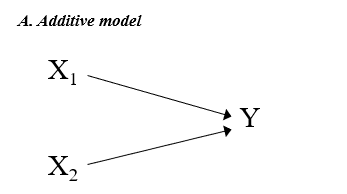

Assuming that you expect a positive effect of $x_{1}$ on Y, you can formulate your ex ante expectation (i.e., hypothesis) as follows: When $x_{1}$ is higher, Y is higher (when $x_{2}$ is held constant). And similarly, assuming that you expect a negative effect of $x_{2}$ on Y, you can formulate your ex ante expectation as follows: When $x_{2}$ is higher, Y is lower (when $x_{1}$ is held constant). Assuming that both independent variables are quantitative, you can then test these hypotheses using the following regression model:

$$Y_{i} = {\alpha} + {\beta}_{1}x_{i1} + {\beta}_{2}x_{i2} + {\epsilon}_{i}$$

, where the components refer to the following:
- ${\alpha}$ = intercept (the estimated value of Y when the x’s are 0).
- ${\beta}_{j}$ = the average change in the value of Y per unit change in $x_{j}$, when the other x’s are held constant (= “partial coefficients”).
- ${\epsilon}_{i}$ = residual (the part of the $Y_{i}$ that is not explained by the model).

However, when the continuous variables are standardized, then:
- ${\beta}_{j}$ = the average change in the value of Y (measured in units of S.D.’s) per S.D. change in $x_{j}$, when the other x’s are held constant.

## Simple regression analysis <a name="Wk4_b"></a>

When regression analysis is used to estimate a model that contains only one independent variable, this is referred to as 'simple regression analysis'. __Before estimating a regression model, it is important to always first take a careful look at univariate and bivariate statistics.__ Here are some useful statistics and plots to obtain an overall impression of (all quantitative variables in) the 'tips' dataset.

In [4]:
# Display summary statistics

df_tips.describe().round(2)

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


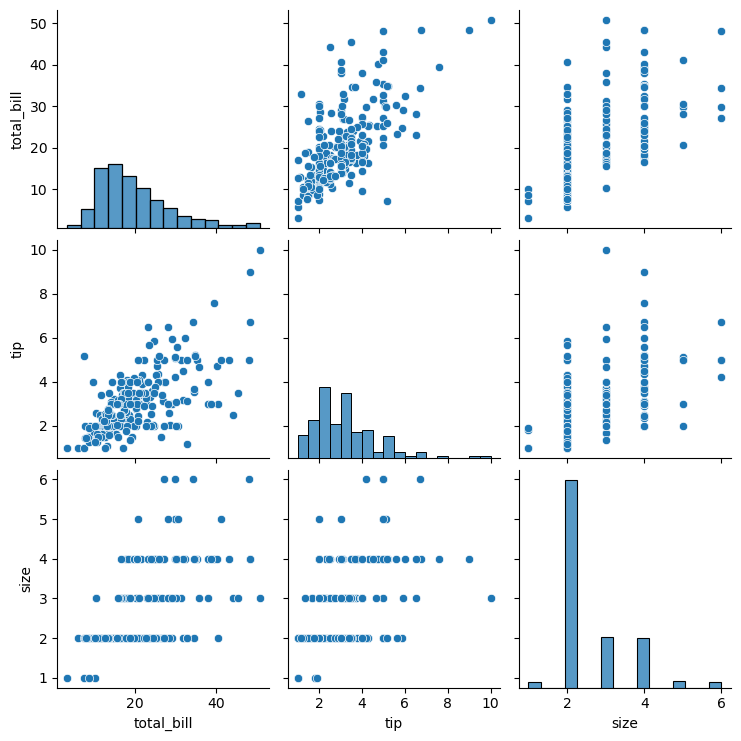

In [5]:
# Display the pairplot with seaborn

sns.pairplot(df_tips);

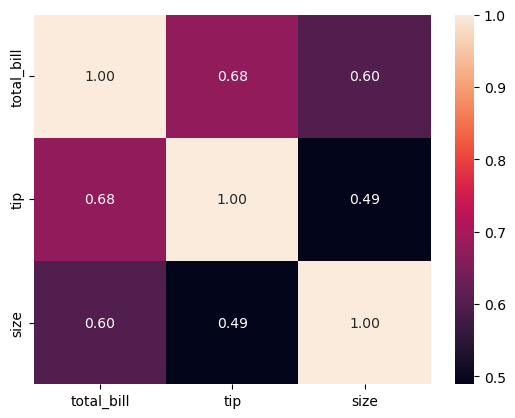

In [6]:
# Display the heatmap with seaborn

sns.heatmap(df_tips.corr(), annot=True, fmt=".2f");

And here are some plots that are useful to obtain a first impression of the focal relationship (in this case, the relationship between the 'total_bill' and 'tip' variables). (Note that these are the same plots as used when discussing the correlation coefficients.)

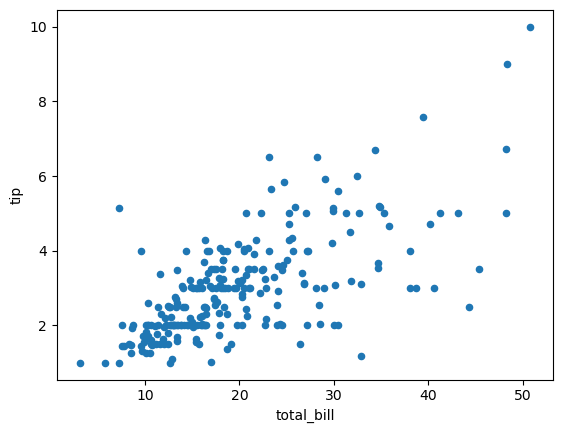

In [7]:
# Display the basic scatterplot with pandas

df_tips.plot.scatter('total_bill', 'tip');

#df_tips.plot(kind='scatter', x='total_bill', y='tip');

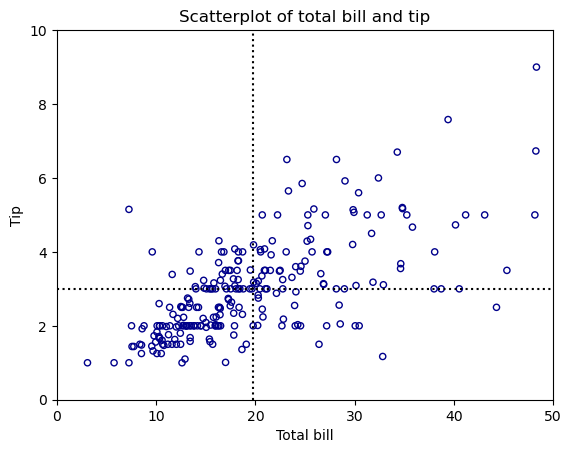

In [8]:
# Display a more informative scatterplot with pandas

df_tips.plot(kind='scatter',
             x='total_bill',
             y='tip',
             c='none',
             edgecolor='darkblue',
             xlim=[0, 50],
             ylim=[0, 10])
plt.plot([0, 50], [df_tips.tip.mean(),
                   df_tips.tip.mean()], 'k:')
plt.plot([df_tips.total_bill.mean(), df_tips.total_bill.mean()],
         [0, 10], 'k:')
plt.title('Scatterplot of total bill and tip')
plt.xlabel('Total bill')
plt.ylabel('Tip');

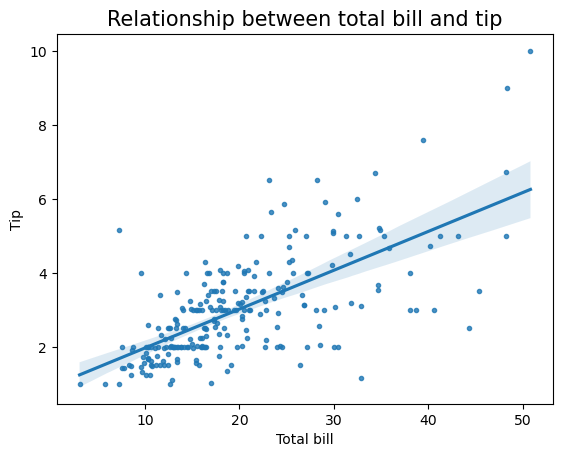

In [9]:
# Display a more informative scatterplot with seaborn

sns.regplot(x='total_bill', y='tip', data=df_tips,  marker='.')
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.title("Relationship between total bill and tip", fontsize=15);

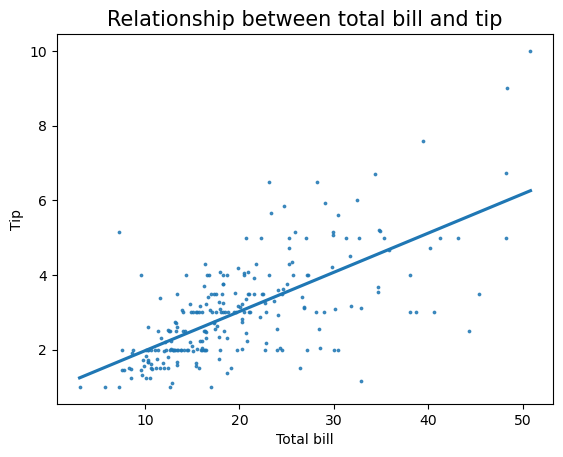

In [10]:
# Display a more informative scatterplot with seaborn

sns.regplot(x='total_bill', y='tip', data=df_tips, scatter_kws={'s':3}, ci=False)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.title("Relationship between total bill and tip", fontsize=15);

In this course, we will use the statsmodels library to estimate regression models in Python. The main steps to run an ordinary least squares (OLS) regression using this library are:
- Import the statsmodels library, typically by typing:
```python
import statsmodels.formula.api as smf
```
- Use the `ols()` command to indicate an ordinary least squares regression:
```python
model = smf.ols(formula='[Dep.var.] ~ [Indep.vars]', data=df)
```
- Fit the regression model:
```python
results = model.fit()
```
- Use the `summary()` command to obtain a number of statistics from the regression model:
```python
print(results.summary())
```

It should be noted, however, that we will typically combine the second and third step in one line of code.

In [11]:
# Regression of the 'tip' variable on 'total_bill' with statsmodels

regr1 = smf.ols(formula='tip ~ total_bill', data=df_tips).fit()
print(regr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           6.69e-34
Time:                        13:53:53   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.0

Some interpretations:  
- About 45.7% (or 45.4%) of the variation in the 'tip' variable is captured by the regression model.
- The average change in the value of the 'tip' variable per unit change in the 'total_bill' variable is 0.105, and this effect is statistically significant. This indicates that when the total bill amount is one dollar higher, on average, the paid tip is 10.5 cents higher.

After estimating a regression model, you can obtain many relevant statistics, not only the ones that are reported in the table above, but also additional ones. Just use one of the helpful features for finding more information that Jupyter notebooks contains (that I showed you in the notebook of week 1) in combination with (in this case) 'regr1.' to obtain the list of options (many of which you will probably never use) that are available in this context. Here are some examples.

In [12]:
# Using the dir() function

dir(regr1)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'info_c

In [13]:
# Obtain the regression coefficient for the 'total_bill' variable

regr1.params[1]

0.10502451738435337

In [14]:
# Obtain the p-value for the 'total_bill' variable

regr1.pvalues[1]

6.692470646863544e-34

These options can, for example, be used to automate the printing of statements based on the results of a regression analysis.

In [15]:
# Define the dependent variable name

y_name = df_tips[['tip']].columns

In [16]:
# Define the independent variable name(s)

X_name = df_tips[['total_bill']].columns

In [17]:
# Define "significant or not significant"

sign = ("" if regr1.pvalues[1] < 0.05 else "not")

In [18]:
# Use f-strings and some options to print a statement

print(f"About {(regr1.rsquared*100):.1f}% (or {(regr1.rsquared_adj*100):.1f}%) of \
the variation in the '{y_name[0]}' variable is captured by the regression model.")

About 45.7% (or 45.4%) of the variation in the 'tip' variable is captured by the regression model.


In [19]:
# Use f-strings and some options to print a statement

print(f"The average change in the value of the '{y_name[0]}' variable per unit change \
in the '{X_name[0]}' variable is {regr1.params[1]:.3f}, and this effect is {sign} \
statistically significant.")

The average change in the value of the 'tip' variable per unit change in the 'total_bill' variable is 0.105, and this effect is  statistically significant.


Or, more importantly, to use the regression model to predict the value of the dependent variable for a particular value of the independent variable(s).

In [20]:
regr1.predict({'total_bill': [30]})

0    4.071005
dtype: float64

In order to obtain the standardized regression coefficients, you first have to calculate the z-scores for all quantitative variables that are part of the model (either as the dependent variable or the independent variable(s)), after which you can estimate the regression model based on these z-scores.

In [21]:
# Calculate the z-scores with SciPy

df_z = df_tips[['tip', 'total_bill']].dropna().apply(stats.zscore)
df_z.head()

,tip,total_bill
0,-1.439947,-0.314711
1,-0.969205,-1.063235
2,0.363356,0.137780
3,0.225754,0.438315
4,0.443020,0.540745


In [22]:
# Regression of the 'tip' variable on 'total_bill' with statsmodels (standardized coefficients)

regr1_z = smf.ols(formula='tip ~ total_bill', data=df_z).fit()
print(regr1_z.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           6.69e-34
Time:                        13:53:53   Log-Likelihood:                -271.81
No. Observations:                 244   AIC:                             547.6
Df Residuals:                     242   BIC:                             554.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.81e-16      0.047   5.93e-15      1.0

In order to estimate the regression model without the intercept, which is quite unusual but which does sometimes happen, you just have to add '- 1' to the formula in statsmodels.

In [23]:
# Regression of the 'tip' variable on 'total_bill' with statsmodels (without the intercept)

regr1_ni = smf.ols(formula='tip ~ total_bill - 1', data=df_tips).fit()
print(regr1_ni.summary())

                                 OLS Regression Results                                
Dep. Variable:                    tip   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                              2004.
Date:                Wed, 09 Aug 2023   Prob (F-statistic):                   2.26e-119
Time:                        13:53:53   Log-Likelihood:                         -366.22
No. Observations:                 244   AIC:                                      734.4
Df Residuals:                     243   BIC:                                      737.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Assumptions underlying regression analysis <a name="Wk4_c"></a>

The main assumptions underlying regression analysis can be summarized as follows (MacKinnon, 2008):
-	Correct functional form (linearity).
-	No omitted influences.
-	Accurate measurement.
-	Well-behaved residuals (constant variance, independence, normality).

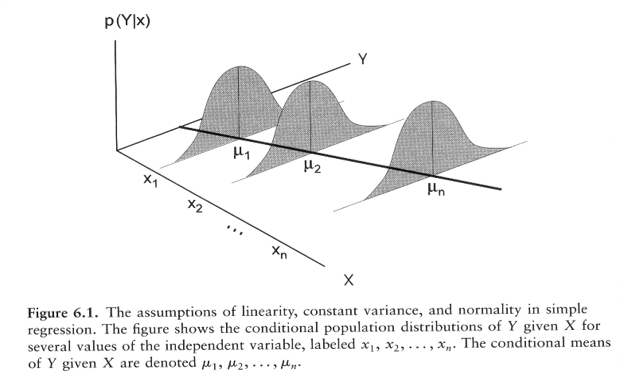

Some of these assumptions can be tested using the (standardized) residuals. The use of inferential tests (of, for example, normality) should always be combined with visual inspection of the data (i.e., graphs) and examination of normality statistics!

Violation of an assumption underlying regression analysis may potentially lead to one of two problems:
1.	The estimates of the regression coefficients may be biased (where bias 	means that the estimates based on the sample will not on average equal the true value of the regression coefficients in the population);  
	In such cases, the estimates of the regression coefficients, R2, significance tests, and confidence intervals may all be incorrect;  
	This happens when the Correct functional form (linearity) assumption is violated.  
2.	Only the estimates of the standard error of the regression coefficients may be biased;  
	In such cases, the estimates of the regression coefficients are correct, but significance tests and confidence intervals may be incorrect;  
	This happens when the Well-behaved residuals (…) assumptions are violated.

Potential remedies and rules of thumb for violation of the normality assumption:
-	Always check for univariate extreme scores (outliers):  
	- Rule of thumb: data points outside ± 3 S.D.’s from the mean;  
	- Potential remedies: trimming, winsorizing, data transformations.  
-	Always check for bi- and multivariate extreme scores (outliers):  
	- At least examine the standardized residuals (but preferably also some other regression diagnostic statistics).  
-	If you use data transformations, then be aware that:  
	- They can introduce complexity into substantive interpretations;  
	- Anchoring the minimum value in a distribution at exactly 1.0 often improves the effectiveness of the data transformation. 

Some common misconceptions concerning the assumptions underlying regression analysis:  
-	“Linear regression analysis requires the dependent variable to be a linear function of the independent variables”;  
	- In reality, linear regression analysis requires the dependent variable to be a linear function of the regression parameters.
-	“Linear regression analysis requires the (independent and/or dependent) variables to be normally distributed”;  
	- In reality, linear regression analysis only requires the errors to be normally distributed, at least in small samples.
-	“Multicollinearity (as reflected by a high variance inflation factor, VIF) is always a problem when estimating a linear regression model”;  
	- In reality, multicollinearity can be safely ignored when the variables with high VIFs are control variables, and the variables of interest do not have high VIFs.

Over the years, many statistical and graphical methods have been developed that can be used to check whether the assumptions underlying regression analysis are (sufficiently) met. In this course, we will limit ourselves to the use of a series of basic checks that are typically enough to base our conclusion upon. In case of a simple regression analysis, this series of basic checks consists of a Q-Q plot and histogram of the standardized residuals to check the normality assumption, and a standardized residuals plot to check the linearity, constant variance and independence assumptions.

In [24]:
# Add the column with standardized residuals

df_tips['std_res_regr1'] = stats.zscore(regr1.resid)

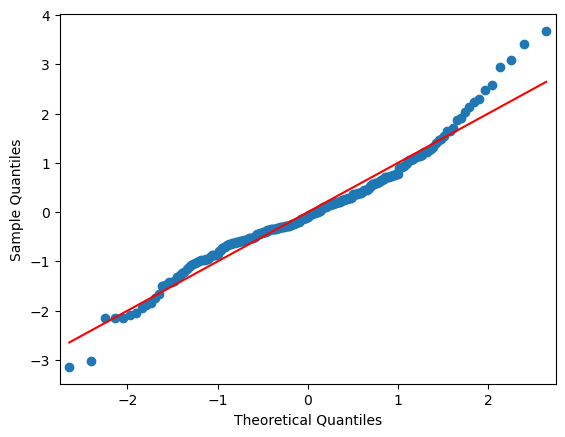

In [25]:
# Q-Q plot of the standardized residuals

statsmodels.graphics.gofplots.qqplot(df_tips['std_res_regr1'], line='r')
plt.show()

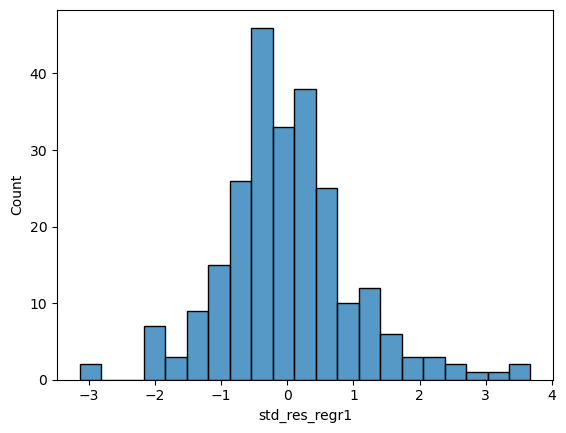

In [26]:
# Histogram of the standardized residuals

sns.histplot(df_tips['std_res_regr1'])
plt.show()

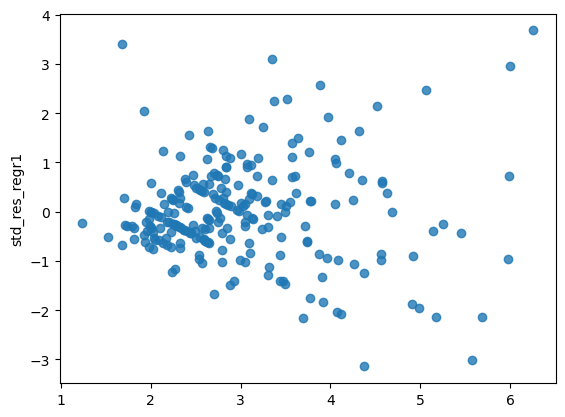

In [27]:
# Fitted values - standardized residuals plot

sns.regplot(x=regr1.fittedvalues, y=df_tips['std_res_regr1'], fit_reg=False)
plt.show()

In [28]:
# Display the largest standardized residuals

df_tips['std_res_regr1'].nlargest(5)

170    3.677785
172    3.407478
183    3.091134
212    2.951215
214    2.575221
Name: std_res_regr1, dtype: float64

In [29]:
# Display the smallest standardized residuals

df_tips['std_res_regr1'].nsmallest(5)

237   -3.142136
102   -3.018966
57    -2.155491
182   -2.144845
184   -2.140800
Name: std_res_regr1, dtype: float64

## Multiple regression analysis <a name="Wk4_d"></a>

When regression analysis is used to estimate a model that contains more than one independent variable, this is referred to as 'multiple regression analysis'.

In [30]:
# Regression of the 'tip' variable on 'total_bill' and 'size'

regr2 = smf.ols(formula='tip ~ total_bill + size', data=df_tips).fit()
print(regr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           9.67e-34
Time:                        13:53:53   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6689      0.194      3.455      0.0

Some interpretations:  
- About 46.8% (or 46.3%) of the variation in the 'tip' variable is captured by the regression model.
- The average change in the value of the 'tip' variable per unit change in the 'total_bill' variable is 0.093, when the other independent variables are held constant, and this effect is statistically significant. This indicates that when the total bill amount is one dollar higher, on average, the paid tip is 9.3 cents higher, after controlling for the size of the group.
- The average change in the value of the 'tip' variable per unit change in the 'size' variable is 0.193, when the other independent variables are held constant, and this effect is statistically significant. This indicates that when the size of the group is one person higher, on average, the paid tip is 19.3 cents higher, after controlling for the total bill amount.

Let's do some checks to examine the underlying assumptions. In case of a multiple regression analysis, the series of basic checks that we saw earlier when I discussed simple regression analysis, needs to be expanded with multicollinearity tests, including a custom function to calculate the variance inflation factors (VIFs).

In [31]:
# The independent variables set

X = df_tips[['total_bill', 'size']]

In [32]:
# The correlations among the independent variables

X.corr()

,total_bill,size
total_bill,1.000000,0.598315
size,0.598315,1.000000


In [33]:
# The variance inflation factors (VIFs)

def vif(X):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    
    X = sm.add_constant(X)
    
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

    return vif_data[1:].round(3)

vif(X)

,feature,VIF
1,total_bill,1.558
2,size,1.558


In [34]:
# Add the column with the standardized residuals to df_tips

df_tips['std_res_regr2'] = stats.zscore(regr2.resid)

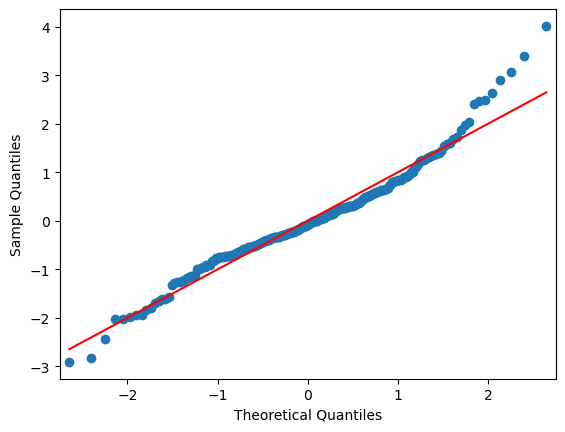

In [35]:
# Q-Q plot of the standardized residuals

statsmodels.graphics.gofplots.qqplot(df_tips['std_res_regr2'], line='r')
plt.show()

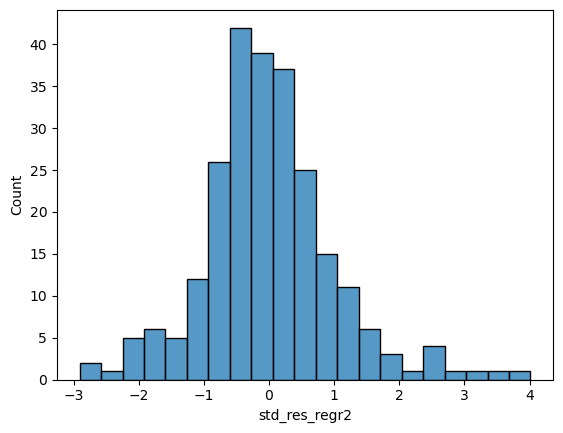

In [36]:
# Histogram of the standardized residuals

sns.histplot(df_tips['std_res_regr2'])
plt.show()

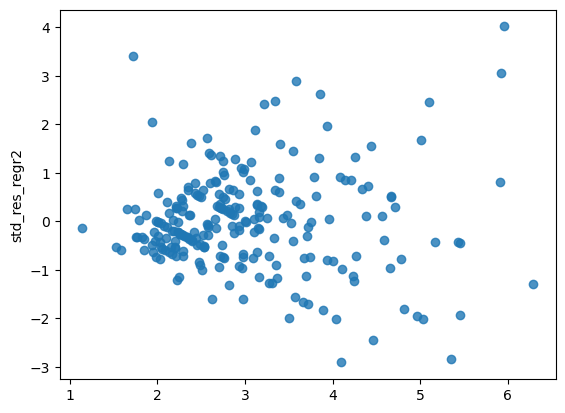

In [37]:
# Fitted values - standardized residuals plot

sns.regplot(x=regr2.fittedvalues, y=df_tips['std_res_regr2'], fit_reg=False)
plt.show()

## Comparing regression models <a name="Wk4_e"></a>

The __partial F-test__ can be used to test whether a subset of a regression model, consisting of one or more parameters, is statistically significant. This test requires regression models to be nested, which is the case when two conditions are met:  
- Both regression models have the same dependent variable.
- All components of the smaller regression model are also part of the larger regression model.

If these two conditions are met, the smaller regression model is argued to be nested in the larger regression model, and we can use the partial F-test to test whether the subset consisting of the difference (in terms of the parameters) between the models is significant. (Note: if the difference between the two models consists of only one variable, the *p*-value of the partial F-test is equal to the *p*-value of that variable as part of the regression model.)

In [38]:
# Display of the Adj. R-squared of the 'regr1' and 'regr2' models

print(regr1.rsquared_adj.round(3))
print(regr2.rsquared_adj.round(3))

0.454
0.463


In [39]:
# Use the partial F-test to test whether the subset is significant

regr2.compare_f_test(regr1)

(5.09631591250066, 0.024872445933337525, 1.0)

In [40]:
# Display the output in a more readable format

part_f = regr2.compare_f_test(regr1)
part_f_stat = (part_f[0].round(3))
part_f_pvalue = ("<0.01" if part_f[1] < 0.01 else (part_f[1].round(3)))
print(f"partial f-test statistic = {part_f_stat}; p-value = {part_f_pvalue}")

partial f-test statistic = 5.096; p-value = 0.025


The null hypothesis in this case is that the subset (i.e., the difference between the two models in terms of the parameters; in this case, the 'size' variable) is not statistically significant. Here, based on the *p*-value of 0.025, we reject the null hypothesis and conclude that the subset is significant with “95% confidence.”

In [41]:
# To check also the p-value of the 'size' variable as part of the regression model

regr2.pvalues[2]

0.024872445933337612

## Regression analysis with categorical variables <a name="Wk4_f"></a>

It is also possible to estimate the effect of a qualitative independent variable on the dependent variable as part of a regression model, by including one or more dummy variables in the regression model. A dummy (or indicator) variable is a variable that can only have two values, usually coded 0 and 1. The number of dummy variables should always be one less than the number of categories, and the category for which all dummy variables are equal to 0 is referred to as the 'reference category'. The interpretation of the regression coefficient of a dummy variable is different from its interpretation in case of a quantitative independent variable. For example, if $x_{j}$ is a dummy variable, then:
- ${\beta}_{j}$ = the average difference in the value of Y between the particular category and the reference category, when the other x’s are held constant.

If the data type of the qualitative variable is equal to 'category', statsmodels will automatically convert this variable into one or more dummy variables when you include it as an independent variable in a regression model. If the data type of this variable is not equal to 'category', however, you can either first convert its data type to 'category' by using the `astype()` method. For example:
```python
df[Indep.var.] = df[Indep.var.].astype('category')
```
Or you can specify this variable in the model formula by wrapping it with C(). For example:
```python
model = smf.ols(formula='[Dep.var.] ~ [Indep.vars] + C([Indep.var.])', data=df)
```
__Always carefully check which category is the reference category!__

In [42]:
# Regression of the 'tip' variable on 'total_bill' and 'smoker'

regr3 = smf.ols(formula='tip ~ total_bill + smoker', data=df_tips).fit()

print(regr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     102.4
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           6.57e-33
Time:                        13:53:54   Log-Likelihood:                -349.93
No. Observations:                 244   AIC:                             705.9
Df Residuals:                     241   BIC:                             716.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8143      0.186      4.369   

Some interpretations:  
- About 45.9% (or 45.5%) of the variation in the 'tip' variable is captured by the regression model.
- The average change in the value of the 'tip' variable per unit change in the 'total_bill' variable is 0.106, when the other independent variables are held constant, and this effect is statistically significant. This indicates that when the total bill amount is one dollar higher, on average, the paid tip is 10.6 cents higher, after controlling for whether the person that pays the bill is a smoker or not.
- The average difference in the value of the 'tip' variable between non-smokers and smokers (i.e., the reference category) is 0.149, when the other independent variables are held constant, and this effect is not statistically significant. This indicates that whether the person that pays the bill is a smoker or not does not seem to have an effect on the paid tip, after controlling for the total bill amount.

__Note that in this regression model, the smokers are the reference group!__

## Regression analysis with interaction effects <a name="Wk4_g"></a>

It is also possible to estimate interaction effects between two (or more) independent variables as part of a regression model. This is typically done by including a so-called 'product term' in the regression model, which is essentially the multiplication of two (or more) independent variables.

When regression analysis is used to estimate a model with interaction effects, such a model is mostly referred to as a 'moderator-variable interaction model', but depending on the expectations of the researcher(s), can also be referred to as an 'independent-variable interaction model'. When there is an independent variable ($x_{1}$) that is expected to have a direct ('main') effect on the dependent variable (Y), and another ('moderator') variable ($x_{2}$) that influences the relationship between $x_{1}$ and Y, graphically the model looks like the one on the left. But when there are two independent variables ($x_{1}$ and $x_{2}$) that are expected to influence each other's relationship with the dependent variable (Y), and that __both__ either have a direct ('main') effect on Y or not, graphically the model looks like the one on the right.
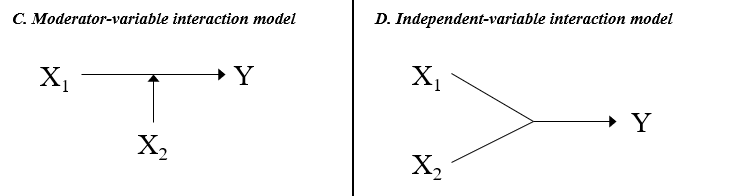

From a statistical perspective, both kinds of interaction models are exactly the same, in the sense that the regression model that can be used to estimate these two models is exactly the same. What differs, however, is the ex ante expectation of the researcher(s) concerning which regression coefficient(s) will be significant. In this course, we will focus on the 'moderator-variable interaction model'. More specifically, we will focus on a particular type of interaction fit (form, monotonic), which (by far) is the most common. (See, e.g., Hartmann and Moers (1999, *AOS*) for a detailed discussion of alternative types of interaction fit.)

Assuming that you expect a positive effect of $x_{2}$ on the relationship between $x_{1}$ and Y, you can formulate your ex ante expectation (i.e., hypothesis) as follows: For higher $x_{2}$, the effect of $x_{1}$ on Y is more positive (or more negative).

A 'moderator variable' can be defined as "a variable that changes the form or strength of the effect of an independent variable on a dependent variable." It is typically an interaction such that the effect of an independent variable on a dependent variable depends on the level of the moderator variable. The most common approach to modeling interactions in regression analysis is to use product terms, such as in the following regression model:

$$Y_{i} = {\alpha} + {\beta}_{1}x_{i1} + {\beta}_{2}x_{i2} + {\beta}_{3}x_{i1}x_{i2} + {\epsilon}_{i}$$

Determining the statistical significance of the interaction effect in this model can be done by examining the significance test of ${\beta}_{3}$.

Depending on whether the moderator variable is a continuous variable or a categorical (dummy) variable, the interpretation of the components of the regression model is somewhat different. Graphically, a positive moderating (interaction) effect when the moderator is a continuous variable looks as follows:
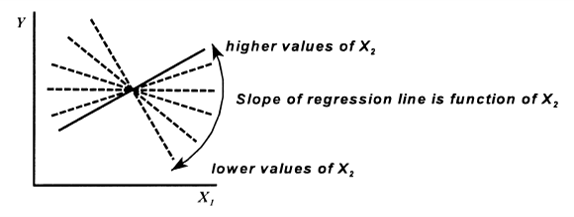

The 'simple slopes' in this graph are determined by the partial derivative of the regression model (${\beta}_{1}$ + ${\beta}_{3}x_{i2}$), and a positive and significant ${\beta}_{3}$ suggests that the slope of the regression line between $x_{1}$ and Y is significantly more positive (or less negative) for higher values of $x_{2}$.

Graphically, a positive moderating (interaction) effect when the moderator is a categorical (dummy) variable looks as follows:
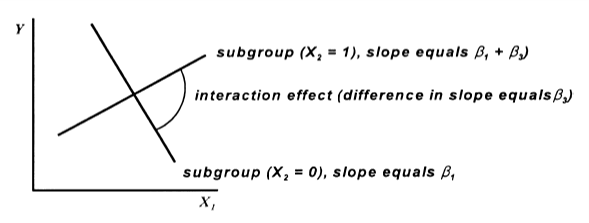

The two 'simple slopes' in this graph are obtained by just filling in the value of the categorical (dummy) variable (either 0 or 1) in the regression model, which leads to the following two regression lines:

$$Y_{i} = {\alpha} + {\beta}_{1}x_{i1} + {\epsilon}_{i}$$
$$Y_{i} = ({\alpha} + {\beta}_{2}) + ({\beta}_{1} + {\beta}_{3})x_{i1} + {\epsilon}_{i}$$

Here, a positive and significant ${\beta}_{3}$ suggests that the slope of the regression line for the ‘$x_{2}$ = 1’ subgroup is significantly ‘more positive’ than the slope of the regression line for the ‘$x_{2}$ = 0’ subgroup.

Some points of attention:
- From a statistical perspective, interaction effects are symmetric; only theory can determine which variable in a 'moderator-variable interaction model' is labeled the moderator variable.
- All the independent variables involved in the product term should always be included in the regression model.
- Moderated regression analysis (MRA) can also be used to analyze (1) multiple two-way interactions, and (2) any n-way interaction. But only do so when you have strong theory!

Adding interaction effects (i.e., product terms) in statsmodels is done by replacing the + in the formula with an *. For example, when both independent variables are quantitative variables:
```python
model = smf.ols(formula='[Dep.var.] ~ [Indep.var.]*[Indep.var.]', data=df)
```
Or when one of the independent variables is a qualitative variable:
```python
model = smf.ols(formula='[Dep.var.] ~ [Indep.var.]*C([Indep.var.])', data=df)
```

### When the moderator variable is a continuous variable

In [43]:
# Regression of the 'tip' variable on 'total_bill', 'size' and their interaction

regr4 = smf.ols(formula='tip ~ total_bill*size', data=df_tips).fit()
print(regr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     70.51
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           9.82e-33
Time:                        13:53:54   Log-Likelihood:                -347.84
No. Observations:                 244   AIC:                             703.7
Df Residuals:                     240   BIC:                             717.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.9183      0.510     

Some interpretations (assuming that 'total_bill' is $x_{1}$ and 'size is $x_{2}$):
- About 46.8% (or 46.2%) of the variation in the 'tip' variable is captured by the regression model.
- The regression coefficient for the 'total_bill' variable reflects the linear regression of the 'tip' variable on the 'total_bill' variable when the 'size' variable is equal to 0: The average change in the value of the 'tip' variable per unit change in the 'total_bill' variable is 0.082, __when the moderator variable ('size') is equal to 0__, and this effect is statistically significant.
- The regression coefficient for the product term reflects the number of units that the slope of the 'tip' variable on the 'total_bill' variable changes given a one-unit increase in the 'size' variable: The average change in the value of the 'tip' variable per unit change in the 'total_bill' variable increases by 0.004 when the moderator variable ('size') increases by one unit, and this effect is not statistically significant.

In [44]:
# The independent variables set (including the product term)

df_tips['total_bill_size'] = df_tips['total_bill'] * df_tips['size']

X = df_tips[['total_bill', 'size', 'total_bill_size']]

In [45]:
# The variance inflation factors (VIFs)

def vif(X):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    
    X = sm.add_constant(X)
    
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

    return vif_data[1:].round(3)

vif(X)

,feature,VIF
1,total_bill,9.404
2,size,9.088
3,total_bill_size,25.574


As shown by the VIFs, the level of multicollinearity is very high. This multicollinearity to a high extent is “nonessential”; i.e., it exists merely due to the scaling (nonzero means) of the 'total_bill' and 'size' variables, and can be eliminated by __mean centering__ the original variables.

In [46]:
# Mean centering the 'total_bill' and 'size' variables

from statsmodels.stats import oneway

df_tips['total_bill_mc'] = oneway.scale_transform(df_tips['total_bill'], center='mean', transform='identity')
df_tips['size_mc'] = oneway.scale_transform(df_tips['size'], center='mean', transform='identity')

df_tips.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.79,8.90,3.07,13.35,17.80,24.13,50.81
tip,244.0,3.00,1.38,1.00,2.00,2.90,3.56,10.00
size,244.0,2.57,0.95,1.00,2.00,2.00,3.00,6.00
std_res_regr1,244.0,0.00,1.00,-3.14,-0.56,-0.10,0.48,3.68
std_res_regr2,244.0,0.00,1.00,-2.91,-0.55,-0.08,0.51,4.01
total_bill_size,244.0,55.89,44.18,3.07,26.82,39.14,69.27,289.02
total_bill_mc,244.0,-0.00,8.90,-16.72,-6.44,-1.99,4.34,31.02
size_mc,244.0,-0.00,0.95,-1.57,-0.57,-0.57,0.43,3.43


In [47]:
# Regression of the 'tip' variable on 'total_bill_mc', 'size_mc' and their interaction

regr4_mc = smf.ols(formula='tip ~ total_bill_mc*size_mc', data=df_tips).fit()
print(regr4_mc.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     70.51
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           9.82e-33
Time:                        13:53:54   Log-Likelihood:                -347.84
No. Observations:                 244   AIC:                             703.7
Df Residuals:                     240   BIC:                             717.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.97

Some interpretations (assuming that 'total_bill' is $x_{1}$ and 'size' is $x_{2}$):
- About 46.8% (or 46.2%) of the variation in the 'tip' variable is captured by the regression model.
- The regression coefficient for the 'total_bill' variable reflects the linear regression of the 'tip' variable on the 'total_bill' variable when the 'size' variable is equal to the sample mean, and also reflects the average linear regression of the 'tip' variable on the 'total_bill' variable across the range of the other independent variables: The average change in the value of the 'tip' variable per unit change in the 'total_bill' variable is 0.092, __when the moderator variable ('size') is equal to the sample mean__, and this effect is statistically significant.
- The regression coefficient for the product term reflects the number of units that the slope of the 'tip' variable on the 'total_bill' variable changes given a one-unit increase in the 'size' variable: The average change in the value of the 'tip' variable per unit change in the 'total_bill' variable increases by 0.004 when the moderator variable ('size') increases by one unit, and this effect is not statistically significant.

### When the moderator variable is a categorical (dummy) variable

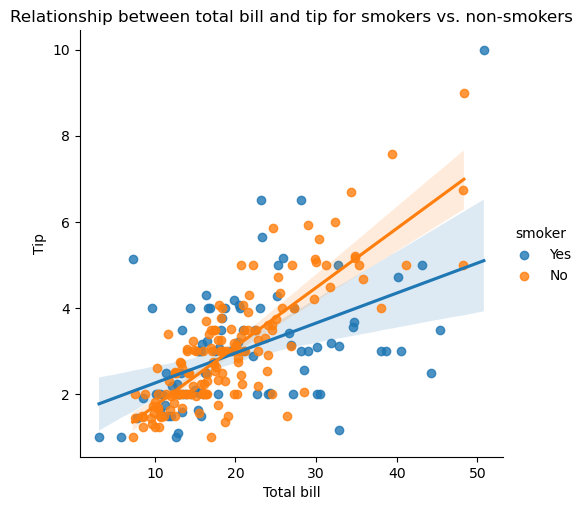

In [48]:
# In this context, the lmplot from seaborn is very informative!

sns.lmplot(x='total_bill', y='tip', hue='smoker', data=df_tips)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.title("Relationship between total bill and tip for smokers vs. non-smokers");

In [49]:
# Regression of the 'tip' variable on 'total_bill', 'smoker' and their interaction

regr5 = smf.ols(formula='tip ~ total_bill*smoker', data=df_tips).fit()
print(regr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     81.95
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           1.56e-36
Time:                        13:53:55   Log-Likelihood:                -338.91
No. Observations:                 244   AIC:                             685.8
Df Residuals:                     240   BIC:                             699.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Some interpretations:  
- About 50.6% (or 50.0%) of the variation in the 'tip' variable is captured by the regression model.
- The intercept of the regression line for the 'smokers' subgroup is 1.564, and the slope of this regression line is 0.070. This indicates that among the smokers, the average change in the value of the 'tip' variable per unit change in the 'total_bill' variable is 0.070, and this effect is statistically significant.
- The intercept of the regression line for the 'non-smokers' subgroup is 1.204 lower than for the 'smokers' subgroup, and this difference is statistically significant. The slope of this regression line is 0.068 higher than for the 'smokers' subgroup, and this difference is also statistically significant.

### Presenting a series of hierarchical models

A nice feature of statsmodels is that when you estimate a series of hierarchical models, you can have them being displayed as separate columns in the same table.

In [50]:
# Presenting the hierarchical models in one table

from statsmodels.iolib.summary2 import summary_col

info_dict={'No. of observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[regr1, regr3, regr5],
                           float_format='%0.2f',
                           stars=True,
                           model_names=['Model 1',
                                        'Model 3',
                                        'Model 5'],
                           info_dict=info_dict,
                           regressor_order=['const',
                                            'total_bill',
                                            'smoker',
                                            'total_bill:smoker'])

results_table.add_title('Table - OLS regressions of three models')

print(results_table)

    Table - OLS regressions of three models
                        Model 1 Model 3 Model 5 
------------------------------------------------
total_bill              0.11*** 0.11*** 0.07*** 
                        (0.01)  (0.01)  (0.01)  
Intercept               0.92*** 0.81*** 1.56*** 
                        (0.16)  (0.19)  (0.24)  
smoker[T.No]                    0.15    -1.20***
                                (0.14)  (0.31)  
total_bill:smoker[T.No]                 0.07*** 
                                        (0.01)  
R-squared               0.46    0.46    0.51    
R-squared Adj.          0.45    0.45    0.50    
No. of observations     244     244     244     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


## Mediation models (indirect effects) <a name="Wk4_h"></a>

It is also possible to use regression analysis to estimate a model that contains one or more indirect effects (i.e., relationships). Such a model is typically referred to as a 'mediation model' or an 'intervening-variable model'. When there is only one indirect effect, such a model is referred to as a 'single mediator model'; when there are more than one indirect effects, such a model is referred to as a 'multiple mediator model'. In this notebook, I will only discuss single mediator models, but all issues that I discuss also apply to multiple mediator models.

When there is an independent variable ($x_{1}$) that __may__ both have a direct effect on a dependent variable (Y), and an indirect effect via another ('intervening') variable ($x_{2}$), graphically the model looks as follows:
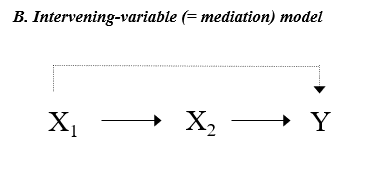

Assuming that you expect a positive effect of $x_{1}$ on $x_{2}$ and a negative effect of $x_{2}$ on Y, you can formulate your ex ante expectation (i.e., hypothesis) as follows: The relationship between $x_{1}$ and Y is explained by an indirect effect, whereby $x_{1}$ increases $x_{2}$, which in turn decreases Y.

If regression analysis is used, a single mediator model is analyzed in three steps:  
1. Regress the dependent variable (Y) on the independent variable ($x_{1}$), to estimate the total effect (c).
2. Regress the intervening variable ($x_{2}$) on the independent variable ($x_{1}$), to estimate the first part of the indirect effect (a).
3. Regress the dependent variable (Y) on both the independent ($x_{1}$) and the intervening ($x_{2}$) variable, to estimate both the direct effect (c') and the second part of the indirect effect (b).

In a highly influential paper, Baron and Kenny (1986, *JP&SP*) presented the so-called 'causal steps' approach. According to this approach, variable $x_{2}$ is considered to be a mediator (i.e., intervening variable) if:
1. $x_{1}$ significantly predicts (or explains) Y (i.e., c ≠ 0).
2. $x_{1}$ significantly predicts (or explains) $x_{2}$ (i.e., a ≠ 0).
3. $x_{2}$ significantly predicts (or explains) Y, controlling for $x_{1}$ (i.e., b ≠ 0).

Then, if the relationship between $x_{1}$ and Y becomes weaker, one refers to this situation as ‘partial mediation’, whereas if the relationship between $x_{1}$ and Y becomes non-significant, one refers to this situation as ‘complete mediation’.

It is now widely recognized that there are three major flaws in the Baron and Kenny (1986) procedure (e.g., Zhao et al., 2010, *JCR*):
- Baron and Kenny claim that mediation is strongest when there is an indirect effect but no direct effect in equation 3. But the strength of mediation should be measured by the size of the indirect effect, not by the lack of the direct effect; the presence of the direct effect can inform theorizing about other mediators.
- There need not be a significant “effect to be mediated” in equation 1. There should be only one requirement to establish mediation, namely that the indirect effect a x b is significant. Other Baron and Kenny tests are useful primarily in classifying the type of the mediation.
- Baron and Kenny provide no direct (formal significance) test of whether the indirect effect is statistically significant, and recommend using the Sobel test for this purpose. However, the Sobel test is low in power compared to bootstrapping of the sampling distribution of a x b (the indirect effect), in some cases markedly so.

Andrew Hayes (http://www.afhayes.com/) has developed a widely used, comprehensive macro (__PROCESS__) for estimating mediation (and other types of) models using regression analysis in SPSS or SAS. Quentin André (https://github.com/QuentinAndre/pyprocessmacro) has recently developed the __pyprocessmacro__ library, which is a complete reimplementation of the PROCESS macro of Andrew Hayes.

Suppose that you expect (hypothesize) that the size of the group ('size') __may__ both have a direct (positive) effect on the paid tip ('tip'), and an indirect (positive) effect via the total bill amount ('total_bill'), and decide to estimate this single mediator model.

In [51]:
# Installing the library (first time only!)

#!pip install pyprocessmacro

In [52]:
# Import the library and estimate the single mediation model

from pyprocessmacro import Process

warnings.filterwarnings("ignore", category=DeprecationWarning)

p = Process(data=df_tips, model=4, x='size', y='tip', m=['total_bill'])
p.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = size
    y = tip
    m1 = total_bill

Sample size:
244

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = tip 
OLS Regression Summary

     R²  Adj. R²    MSE        F  df1  df2  p-value
 0.4679   0.4612 1.0272 105.9481    2  241   0.0000

Coefficients

            coeff     se       t      p   LLCI   ULCI
Cons       0.6689 0.1936  3.4551 0.0006 0.2895 1.0484
size       0.1926 0.0853  2.2575 0.0249 0.0254 0.3598
total_bill 0.0927 0.0091 10.1719 0.0000 0.0748 0.1106

-------------------------------------------------------------------------

Outcome = total_bill 
OLS Regression Summary


Some interpretations:  
- The total effect (c) quantifies how much two cases that differ by one unit on the independent variable ($x_{1}$) are estimated to differ on the dependent variable (Y). The total effect is not shown in the output, but is by definition equal to the direct effect (0.193) plus the indirect effect (0.519) and therefore equal to 0.712. (To check this, just estimate the regression model with the 'size' variable as the independent variable and the 'tip' variable as the dependent variable, and you will see that the regression coefficient of the 'size' variable is indeed equal to 0.712.)
- The direct effect (c') quantifies how much two cases that differ by one unit on the independent variable ($x_{1}$) but are equal on the intervening variable ($x_{2}$) are estimated to differ on the dependent variable (Y). As shown in the output, the direct effect of the size of the group on the paid tip is 0.193, and (given that both LLCI and ULCI are positive, meaning that the CI does not include zero (0)) statistically significant.
- The indirect effect (a x b) quantifies how much two cases that differ by one unit on the independent variable ($x_{1}$) are estimated to differ on the dependent variable (Y) as a result of the effect of the independent variable ($x_{1}$) on the intervening variable ($x_{2}$) which, in turn, affects Y. As shown in the output, the indirect effect of the size of the group on the paid tip via the total bill amount is 0.519, and (given that both BootLLCI and BootULCI are positive, meaning that the BootCI does not include zero (0)) statistically significant.

# Application of regression analysis - The determinants of audit fees <a name="Wk4_i"></a>

A substantial body of research has studied the determinants of audit fees. Hay, Knechel and Wong (2006, *CAR*) provide a survey of published studies on this topic, and note that empirical research has clearly identified size, complexity, and risk as central components in determining audit fees (Loughran and McDonald, 2020). In a recent working paper, Loughran and McDonald (2020) build on these studies to validate their new, text-based measure of firm complexity. In this illustrative application of regression analysis, I will first analyze the determinants of audit fees using a specification that is based on (part of) their models. More specifically, I will estimate the following regression model:

$$log(Audit Fees)_{it+1} = {\alpha} + {\beta}_{1}log(Total Assets)_{it} + {\beta}_{2}Loss_{it} + {\beta}_{3}\% Leverage_{it} + {\beta}_{4}\% Goodwill_{it} + {\beta}_{5}\% (Invent._{it} + Rec._{it}) + {\beta}_{6}Segments_{it} + {\epsilon}_{it}$$

where *Audit Fees* are the auditor fees as reported by Audit Analytics; *Loss* is set to one if net income has a negative value, else zero; *% Leverage* is (short-term debt + long-term debt)/total assets; *% Goodwill* is goodwill/total assets; *%( Invent. + Rec.)* is (inventory + receivables)/total assets; and *Segments* is the sum of all segment types for a firm reported in the Compustat Historical Segments file.

Next, I will also analyze whether the independent variables that are part of this model are also related to absolute changes in firms' audit fees. I will analyze all relationships among the index constituents of the S&P 500 list (on December 31, 2020), and will base my analyses on fiscal years 2018 (*t*) and 2019 (*t+1*). Also, I will combine and use data from three different data sources (files): 'data_aud_1819.xlsx', 'data_comp_18.xlsx' and 'data_segm_18.xlsx'.

In [53]:
# Import the first dataset

df_aud = pd.read_excel('data/data_aud_1819.xlsx')
df_aud.head()

,Fiscal year ended,Audit fees,Company fkey,TICKER,NAME
0,2018-12-31,25381000,1800,ABT,ABBOTT LABORATORIES
1,2019-12-31,23960000,1800,ABT,ABBOTT LABORATORIES
2,2018-12-28,4908000,2488,AMD,ADVANCED MICRO DEVICES INC
3,2019-12-26,4974000,2488,AMD,ADVANCED MICRO DEVICES INC
4,2018-09-30,6800000,2969,APD,AIR PRODUCTS & CHEMICALS INC /DE/


In [54]:
# Display general information

df_aud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fiscal year ended  981 non-null    datetime64[ns]
 1   Audit fees         981 non-null    int64         
 2   Company fkey       981 non-null    int64         
 3   TICKER             981 non-null    object        
 4   NAME               981 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 38.4+ KB


In [55]:
# Convert the data type of 'Fiscal year ended' to string (object)

df_aud['Fiscal year ended'] = df_aud['Fiscal year ended'].astype(str)
df_aud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Fiscal year ended  981 non-null    object
 1   Audit fees         981 non-null    int64 
 2   Company fkey       981 non-null    int64 
 3   TICKER             981 non-null    object
 4   NAME               981 non-null    object
dtypes: int64(2), object(3)
memory usage: 38.4+ KB


In [56]:
# Select the observations from fiscal year 2018

df_aud_18 = df_aud[df_aud['Fiscal year ended'].str.startswith('2018')]
df_aud_18.head()

,Fiscal year ended,Audit fees,Company fkey,TICKER,NAME
0,2018-12-31,25381000,1800,ABT,ABBOTT LABORATORIES
2,2018-12-28,4908000,2488,AMD,ADVANCED MICRO DEVICES INC
4,2018-09-30,6800000,2969,APD,AIR PRODUCTS & CHEMICALS INC /DE/
6,2018-09-29,2479090,4127,SWKS,"SKYWORKS SOLUTIONS, INC."
8,2018-12-31,9000000,4281,HWM,Howmet Aerospace Inc.


In [57]:
# Select the observations from fiscal year 2019

df_aud_19 = df_aud[df_aud['Fiscal year ended'].str.startswith('2019')]
df_aud_19.head()

,Fiscal year ended,Audit fees,Company fkey,TICKER,NAME
1,2019-12-31,23960000,1800,ABT,ABBOTT LABORATORIES
3,2019-12-26,4974000,2488,AMD,ADVANCED MICRO DEVICES INC
5,2019-09-30,5400000,2969,APD,AIR PRODUCTS & CHEMICALS INC /DE/
7,2019-10-02,2315150,4127,SWKS,"SKYWORKS SOLUTIONS, INC."
9,2019-12-31,9800000,4281,HWM,Howmet Aerospace Inc.


In [58]:
# Merge the two subsets (i.e., the selected observations from both fiscal years)

df_aud_comb = pd.merge(df_aud_18, df_aud_19, how='inner', on=['TICKER', 'NAME'], suffixes=('_18', '_19'))
df_aud_comb.head()

,Fiscal year ended_18,Audit fees_18,Company fkey_18,TICKER,NAME,Fiscal year ended_19,Audit fees_19,Company fkey_19
0,2018-12-31,25381000,1800,ABT,ABBOTT LABORATORIES,2019-12-31,23960000,1800
1,2018-12-28,4908000,2488,AMD,ADVANCED MICRO DEVICES INC,2019-12-26,4974000,2488
2,2018-09-30,6800000,2969,APD,AIR PRODUCTS & CHEMICALS INC /DE/,2019-09-30,5400000,2969
3,2018-09-29,2479090,4127,SWKS,"SKYWORKS SOLUTIONS, INC.",2019-10-02,2315150,4127
4,2018-12-31,9000000,4281,HWM,Howmet Aerospace Inc.,2019-12-31,9800000,4281


In [59]:
# Create new variable ('abs_growth_fees')

df_aud_comb['abs_growth_fees'] = (df_aud_comb['Audit fees_19'] - df_aud_comb['Audit fees_18'])
df_aud_comb.head()

,Fiscal year ended_18,Audit fees_18,Company fkey_18,TICKER,NAME,Fiscal year ended_19,Audit fees_19,Company fkey_19,abs_growth_fees
0,2018-12-31,25381000,1800,ABT,ABBOTT LABORATORIES,2019-12-31,23960000,1800,-1421000
1,2018-12-28,4908000,2488,AMD,ADVANCED MICRO DEVICES INC,2019-12-26,4974000,2488,66000
2,2018-09-30,6800000,2969,APD,AIR PRODUCTS & CHEMICALS INC /DE/,2019-09-30,5400000,2969,-1400000
3,2018-09-29,2479090,4127,SWKS,"SKYWORKS SOLUTIONS, INC.",2019-10-02,2315150,4127,-163940
4,2018-12-31,9000000,4281,HWM,Howmet Aerospace Inc.,2019-12-31,9800000,4281,800000


In [60]:
# Drop all unnecessary (2018) columns, and create new variable ('audit_fees_ln')

df_aud_19 = df_aud_comb[['Fiscal year ended_19', 'Audit fees_19', 'Company fkey_19', 'TICKER', 'NAME', 'abs_growth_fees']]
df_aud_19['audit_fees_ln'] = np.log(df_aud_19['Audit fees_19'])
df_aud_19.head()

C:\Users\mse700\AppData\Local\Temp\ipykernel_648\4146596026.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aud_19['audit_fees_ln'] = np.log(df_aud_19['Audit fees_19'])


,Fiscal year ended_19,Audit fees_19,Company fkey_19,TICKER,NAME,abs_growth_fees,audit_fees_ln
0,2019-12-31,23960000,1800,ABT,ABBOTT LABORATORIES,-1421000,16.991896
1,2019-12-26,4974000,2488,AMD,ADVANCED MICRO DEVICES INC,66000,15.419735
2,2019-09-30,5400000,2969,APD,AIR PRODUCTS & CHEMICALS INC /DE/,-1400000,15.501910
3,2019-10-02,2315150,4127,SWKS,"SKYWORKS SOLUTIONS, INC.",-163940,14.654985
4,2019-12-31,9800000,4281,HWM,Howmet Aerospace Inc.,800000,16.097893


In [61]:
# Display general information

df_aud_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 489
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fiscal year ended_19  490 non-null    object 
 1   Audit fees_19         490 non-null    int64  
 2   Company fkey_19       490 non-null    int64  
 3   TICKER                490 non-null    object 
 4   NAME                  490 non-null    object 
 5   abs_growth_fees       490 non-null    int64  
 6   audit_fees_ln         490 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 30.6+ KB


In [62]:
# Import the second dataset

df_comp = pd.read_excel('data/data_comp_18.xlsx')
df_comp.head()

,Global Company Key,Data Date,Data Year - Fiscal,Industry Format,Level of Consolidation - Company Annual Descriptor,Population Source,Data Format,Ticker Symbol,Company Name,ISO Currency Code,Assets - Total,Debt in Current Liabilities - Total,Long-Term Debt - Total,Goodwill,Inventories - Total,Net Income (Loss),Receivables - Total,Active/Inactive Status Marker,Standard Industry Classification Code
0,1045,2018-12-31,2018,INDL,C,D,STD,AAL,AMERICAN AIRLINES GROUP INC,USD,60580.000,4948.0,29081.000,4091.0,1522.000,1412.000,1706.000,A,4512
1,1075,2018-12-31,2018,INDL,C,D,STD,PNW,PINNACLE WEST CAPITAL CORP,USD,17664.202,576.4,4638.232,0.0,294.094,511.047,400.988,A,4911
2,1078,2018-12-31,2018,INDL,C,D,STD,ABT,ABBOTT LABORATORIES,USD,67173.000,207.0,19359.000,23254.0,3796.000,2368.000,5182.000,A,3845
3,1161,2018-12-31,2018,INDL,C,D,STD,AMD,ADVANCED MICRO DEVICES,USD,4556.000,136.0,1114.000,289.0,845.000,337.000,1269.000,A,3674
4,1209,2018-09-30,2018,INDL,C,D,STD,APD,AIR PRODUCTS & CHEMICALS INC,USD,19178.300,460.9,3351.700,788.9,473.600,1497.800,1438.300,A,2810


In [63]:
# Remove financial institutions and regulated industries

df_comp = df_comp[(df_comp['Standard Industry Classification Code'] < 4900) |
                  (df_comp['Standard Industry Classification Code'] > 4999)]
df_comp = df_comp[(df_comp['Standard Industry Classification Code'] < 6000) |
                  (df_comp['Standard Industry Classification Code'] > 6999)]
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 0 to 496
Data columns (total 19 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   Global Company Key                                  364 non-null    int64         
 1   Data Date                                           364 non-null    datetime64[ns]
 2   Data Year - Fiscal                                  364 non-null    int64         
 3   Industry Format                                     364 non-null    object        
 4   Level of Consolidation - Company Annual Descriptor  364 non-null    object        
 5   Population Source                                   364 non-null    object        
 6   Data Format                                         364 non-null    object        
 7   Ticker Symbol                                       364 non-null    object        
 8   Company Na

In [64]:
# Create five new variables ('total_assets_ln', 'loss', 'perc_leverage', 'perc_goodwill' and 'perc_invent_rec')

df_comp['total_assets_ln'] = np.log(df_comp['Assets - Total'])
df_comp['loss'] = np.where(df_comp['Net Income (Loss)'] < 0,1,0)
df_comp['perc_leverage'] = (df_comp['Debt in Current Liabilities - Total'] + df_comp['Long-Term Debt - Total']) / df_comp['Assets - Total']
df_comp['perc_goodwill'] = df_comp['Goodwill'] / df_comp['Assets - Total']
df_comp['perc_invent_rec'] = (df_comp['Inventories - Total'] + df_comp['Receivables - Total']) / df_comp['Assets - Total']
df_comp.head()

,Global Company Key,Data Date,Data Year - Fiscal,Industry Format,Level of Consolidation - Company Annual Descriptor,Population Source,Data Format,Ticker Symbol,Company Name,ISO Currency Code,...,Inventories - Total,Net Income (Loss),Receivables - Total,Active/Inactive Status Marker,Standard Industry Classification Code,total_assets_ln,loss,perc_leverage,perc_goodwill,perc_invent_rec
0,1045,2018-12-31,2018,INDL,C,D,STD,AAL,AMERICAN AIRLINES GROUP INC,USD,...,1522.0,1412.0,1706.0,A,4512,11.011720,0,0.561720,0.067531,0.053285
2,1078,2018-12-31,2018,INDL,C,D,STD,ABT,ABBOTT LABORATORIES,USD,...,3796.0,2368.0,5182.0,A,3845,11.115027,0,0.291278,0.346181,0.133655
3,1161,2018-12-31,2018,INDL,C,D,STD,AMD,ADVANCED MICRO DEVICES,USD,...,845.0,337.0,1269.0,A,3674,8.424200,0,0.274363,0.063433,0.464004
4,1209,2018-09-30,2018,INDL,C,D,STD,APD,AIR PRODUCTS & CHEMICALS INC,USD,...,473.6,1497.8,1438.3,A,2810,9.861535,0,0.198798,0.041135,0.099691
5,1230,2018-12-31,2018,INDL,C,D,STD,ALK,ALASKA AIR GROUP INC,USD,...,60.0,437.0,366.0,A,4512,9.297618,0,0.192724,0.178061,0.039040


In [65]:
# Import the third dataset

df_segm = pd.read_excel('data/data_segm_18.xlsx')
df_segm.head()

,Global Company Key - Segment Annual Fundamentals,Segment Type,Segment Identifier,Data Date - Segment Annual Fundamentals,Source Date - Segment Annual Fundamentals,SIC Code (Primary),SIC Code (Secondary),Segment Name,Company Name,Ticker Symbol
0,1045,GEOSEG,8,2018-12-31,2018-12-31,4512.0,4581.0,Pacific,AMERICAN AIRLINES GROUP INC,AAL
1,1045,GEOSEG,7,2018-12-31,2019-12-31,4512.0,4581.0,Latin America,AMERICAN AIRLINES GROUP INC,AAL
2,1045,GEOSEG,5,2018-12-31,2019-12-31,4512.0,4581.0,Europe,AMERICAN AIRLINES GROUP INC,AAL
3,1045,GEOSEG,2,2018-12-31,2019-12-31,4512.0,4581.0,United States,AMERICAN AIRLINES GROUP INC,AAL
4,1045,GEOSEG,8,2018-12-31,2019-12-31,4512.0,4581.0,Pacific,AMERICAN AIRLINES GROUP INC,AAL


In [66]:
# Create new variable ('no_of_segments')

df_segm['no_of_segments'] = df_segm.groupby('Ticker Symbol')['Company Name'].transform('size')
df_segm.head()

,Global Company Key - Segment Annual Fundamentals,Segment Type,Segment Identifier,Data Date - Segment Annual Fundamentals,Source Date - Segment Annual Fundamentals,SIC Code (Primary),SIC Code (Secondary),Segment Name,Company Name,Ticker Symbol,no_of_segments
0,1045,GEOSEG,8,2018-12-31,2018-12-31,4512.0,4581.0,Pacific,AMERICAN AIRLINES GROUP INC,AAL,10
1,1045,GEOSEG,7,2018-12-31,2019-12-31,4512.0,4581.0,Latin America,AMERICAN AIRLINES GROUP INC,AAL,10
2,1045,GEOSEG,5,2018-12-31,2019-12-31,4512.0,4581.0,Europe,AMERICAN AIRLINES GROUP INC,AAL,10
3,1045,GEOSEG,2,2018-12-31,2019-12-31,4512.0,4581.0,United States,AMERICAN AIRLINES GROUP INC,AAL,10
4,1045,GEOSEG,8,2018-12-31,2019-12-31,4512.0,4581.0,Pacific,AMERICAN AIRLINES GROUP INC,AAL,10


In [67]:
# Select one row per firm in the 'df_segm' DataFrame, and merge the three DataFrames

df_segm_grouped = df_segm.groupby('Ticker Symbol')['Company Name', 'Ticker Symbol', 'no_of_segments'].head(1)
df_comb = pd.merge(df_comp, df_segm_grouped, how='inner', on='Ticker Symbol')
df_comb = pd.merge(df_comb, df_aud_19, how='inner', left_on='Ticker Symbol', right_on='TICKER')
df_comb.head()

C:\Users\mse700\AppData\Local\Temp\ipykernel_648\461761190.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_segm_grouped = df_segm.groupby('Ticker Symbol')['Company Name', 'Ticker Symbol', 'no_of_segments'].head(1)


,Global Company Key,Data Date,Data Year - Fiscal,Industry Format,Level of Consolidation - Company Annual Descriptor,Population Source,Data Format,Ticker Symbol,Company Name_x,ISO Currency Code,...,perc_invent_rec,Company Name_y,no_of_segments,Fiscal year ended_19,Audit fees_19,Company fkey_19,TICKER,NAME,abs_growth_fees,audit_fees_ln
0,1045,2018-12-31,2018,INDL,C,D,STD,AAL,AMERICAN AIRLINES GROUP INC,USD,...,0.053285,AMERICAN AIRLINES GROUP INC,10,2019-12-31,4120000,6201,AAL,American Airlines Group Inc.,110000,15.231364
1,1078,2018-12-31,2018,INDL,C,D,STD,ABT,ABBOTT LABORATORIES,USD,...,0.133655,ABBOTT LABORATORIES,28,2019-12-31,23960000,1800,ABT,ABBOTT LABORATORIES,-1421000,16.991896
2,1161,2018-12-31,2018,INDL,C,D,STD,AMD,ADVANCED MICRO DEVICES,USD,...,0.464004,ADVANCED MICRO DEVICES,20,2019-12-26,4974000,2488,AMD,ADVANCED MICRO DEVICES INC,66000,15.419735
3,1209,2018-09-30,2018,INDL,C,D,STD,APD,AIR PRODUCTS & CHEMICALS INC,USD,...,0.099691,AIR PRODUCTS & CHEMICALS INC,20,2019-09-30,5400000,2969,APD,AIR PRODUCTS & CHEMICALS INC /DE/,-1400000,15.501910
4,1230,2018-12-31,2018,INDL,C,D,STD,ALK,ALASKA AIR GROUP INC,USD,...,0.039040,ALASKA AIR GROUP INC,8,2019-12-31,1982040,766421,ALK,"ALASKA AIR GROUP, INC.",-6424,14.499637


In [68]:
# Display the column names

print(df_comb.columns.tolist())

['Global Company Key', 'Data Date', 'Data Year - Fiscal', 'Industry Format', 'Level of Consolidation - Company Annual Descriptor', 'Population Source', 'Data Format', 'Ticker Symbol', 'Company Name_x', 'ISO Currency Code', 'Assets - Total', 'Debt in Current Liabilities - Total', 'Long-Term Debt - Total', 'Goodwill', 'Inventories - Total', 'Net Income (Loss)', 'Receivables - Total', 'Active/Inactive Status Marker', 'Standard Industry Classification Code', 'total_assets_ln', 'loss', 'perc_leverage', 'perc_goodwill', 'perc_invent_rec', 'Company Name_y', 'no_of_segments', 'Fiscal year ended_19', 'Audit fees_19', 'Company fkey_19', 'TICKER', 'NAME', 'abs_growth_fees', 'audit_fees_ln']


In [69]:
# Select the necessary variables (columns) and drop all rows with missing values

df_comb = df_comb[['Ticker Symbol', 'total_assets_ln', 'loss', 'perc_leverage', 'perc_goodwill', 'perc_invent_rec', \
                   'no_of_segments', 'abs_growth_fees', 'audit_fees_ln']].dropna()
df_comb

,Ticker Symbol,total_assets_ln,loss,perc_leverage,perc_goodwill,perc_invent_rec,no_of_segments,abs_growth_fees,audit_fees_ln
0,AAL,11.011720,0,0.561720,0.067531,0.053285,10,110000,15.231364
1,ABT,11.115027,0,0.291278,0.346181,0.133655,28,-1421000,16.991896
2,AMD,8.424200,0,0.274363,0.063433,0.464004,20,66000,15.419735
3,APD,9.861535,0,0.198798,0.041135,0.099691,20,-1400000,15.501910
4,ALK,9.297618,0,0.192724,0.178061,0.039040,8,-6424,14.499637
...,...,...,...,...,...,...,...,...,...
351,MPC,11.439709,0,0.296148,0.217172,0.168819,10,-690000,16.207296
352,FBHS,8.693597,0,0.391309,0.348774,0.209670,18,327000,15.329538
353,XYL,8.884887,0,0.319579,0.412074,0.238438,16,-322000,15.635209
354,LYB,10.249839,0,0.331954,0.064149,0.316465,32,1100000,16.157316


In [70]:
# Estimate the first regression model

regr1 = smf.ols(formula = 'audit_fees_ln ~ total_assets_ln + loss + perc_leverage + perc_goodwill + perc_invent_rec + no_of_segments', data=df_comb).fit()
print(regr1.summary())

                            OLS Regression Results                            
Dep. Variable:          audit_fees_ln   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     126.3
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           3.37e-83
Time:                        13:53:57   Log-Likelihood:                -228.11
No. Observations:                 345   AIC:                             470.2
Df Residuals:                     338   BIC:                             497.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           9.8493      0.229     

In [71]:
# The independent variables set

X = df_comb[['total_assets_ln', 'loss', 'perc_leverage', 'perc_goodwill', 'perc_invent_rec', 'no_of_segments']]

In [72]:
# The correlations among the independent variables

X.corr()

,total_assets_ln,loss,perc_leverage,perc_goodwill,perc_invent_rec,no_of_segments
total_assets_ln,1.000000,0.036568,-0.002678,-0.011894,-0.173311,0.172551
loss,0.036568,1.000000,0.010086,0.034851,-0.069849,0.040824
perc_leverage,-0.002678,0.010086,1.000000,0.013708,-0.037276,-0.049406
perc_goodwill,-0.011894,0.034851,0.013708,1.000000,-0.209131,0.106427
perc_invent_rec,-0.173311,-0.069849,-0.037276,-0.209131,1.000000,0.080344
no_of_segments,0.172551,0.040824,-0.049406,0.106427,0.080344,1.000000


In [73]:
# The variance inflation factors (VIFs)

def vif(X):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    
    X = sm.add_constant(X)
    
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

    return vif_data[1:].round(3)

vif(X)

,feature,VIF
1,total_assets_ln,1.076
2,loss,1.008
3,perc_leverage,1.004
4,perc_goodwill,1.069
5,perc_invent_rec,1.108
6,no_of_segments,1.069


In [74]:
# Add the column with standardized residuals

df_comb['std_res_regr1'] = stats.zscore(regr1.resid)

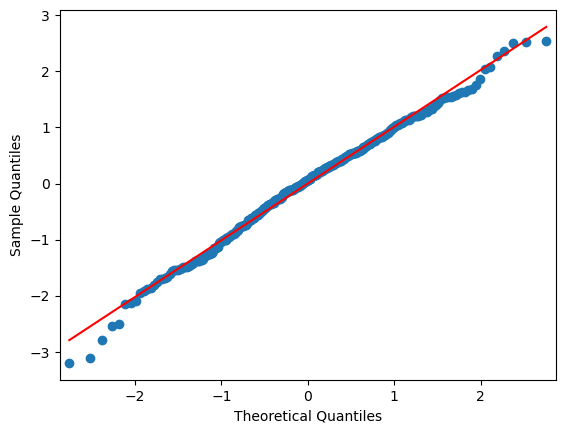

In [75]:
# Q-Q plot of the standardized residuals

statsmodels.graphics.gofplots.qqplot(df_comb['std_res_regr1'], line='r')
plt.show()

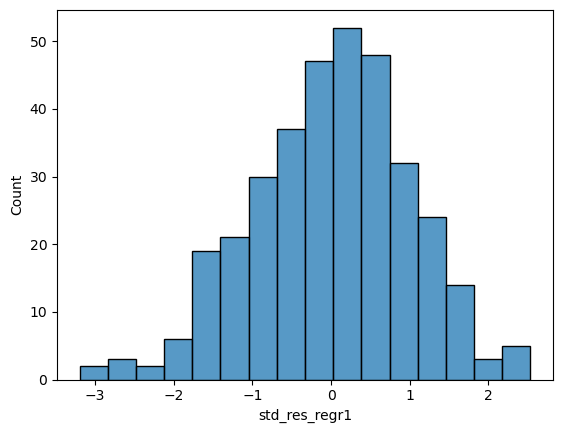

In [76]:
# Histogram of the standardized residuals

sns.histplot(df_comb['std_res_regr1'])
plt.show()

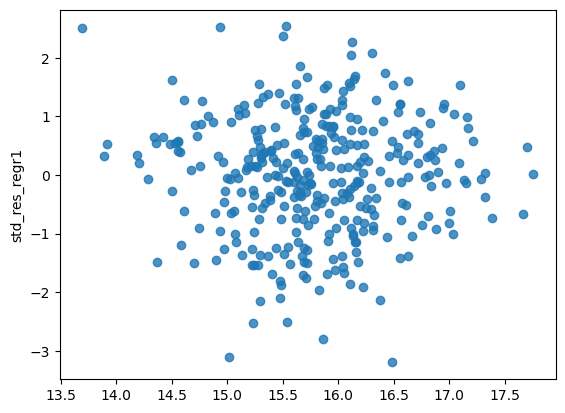

In [77]:
# Fitted values - standardized residuals plot

sns.regplot(x=regr1.fittedvalues, y=df_comb['std_res_regr1'], fit_reg=False)
plt.show()

In [78]:
# Estimate the second regression model

regr2 = smf.ols(formula = 'abs_growth_fees ~ total_assets_ln + loss + perc_leverage + perc_goodwill + perc_invent_rec + no_of_segments', data=df_comb).fit()
print(regr2.summary())

                            OLS Regression Results                            
Dep. Variable:        abs_growth_fees   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.617
Date:                Wed, 09 Aug 2023   Prob (F-statistic):              0.141
Time:                        13:53:58   Log-Likelihood:                -5600.7
No. Observations:                 345   AIC:                         1.122e+04
Df Residuals:                     338   BIC:                         1.124e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2.958e+06   1.33e+06     

In [79]:
# Add the column with standardized residuals

df_comb['std_res_regr2'] = stats.zscore(regr2.resid)

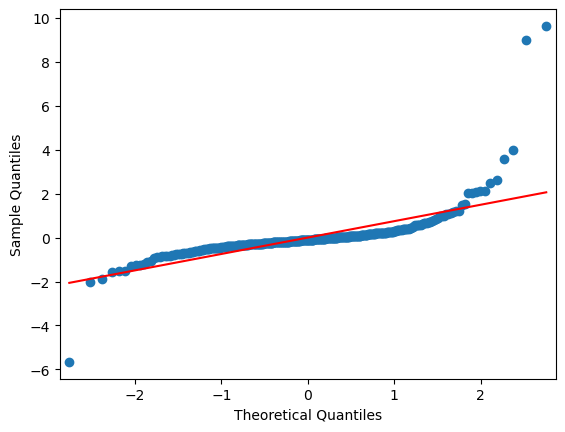

In [80]:
# Q-Q plot of the standardized residuals

statsmodels.graphics.gofplots.qqplot(df_comb['std_res_regr2'], line='r')
plt.show()

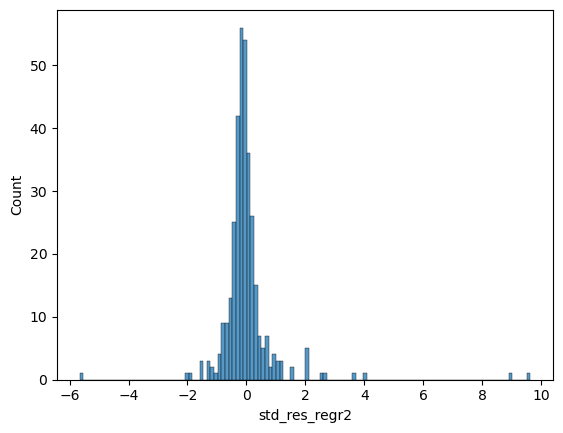

In [81]:
# Histogram of the standardized residuals

sns.histplot(df_comb['std_res_regr2'])
plt.show()

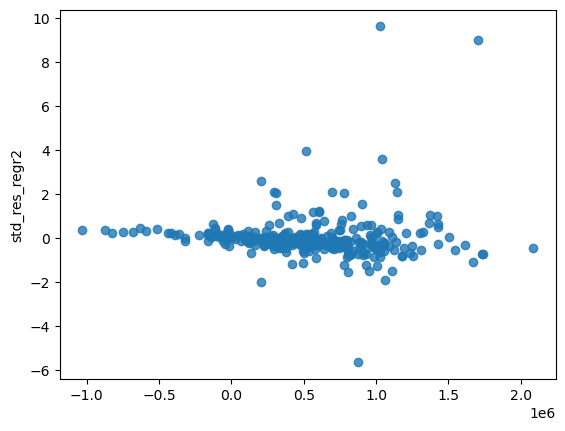

In [82]:
# Fitted values - standardized residuals plot

sns.regplot(x=regr2.fittedvalues, y=df_comb['std_res_regr2'], fit_reg=False)
plt.show()

In [83]:
# Remove the outliers

df_comb_nw = df_comb[abs(df_comb['std_res_regr2']) <= 3]
df_comb_nw

,Ticker Symbol,total_assets_ln,loss,perc_leverage,perc_goodwill,perc_invent_rec,no_of_segments,abs_growth_fees,audit_fees_ln,std_res_regr1,std_res_regr2
0,AAL,11.011720,0,0.561720,0.067531,0.053285,10,110000,15.231364,-1.855975,-0.166812
1,ABT,11.115027,0,0.291278,0.346181,0.133655,28,-1421000,16.991896,0.254026,-0.885030
2,AMD,8.424200,0,0.274363,0.063433,0.464004,20,66000,15.419735,0.392574,-0.212127
3,APD,9.861535,0,0.198798,0.041135,0.099691,20,-1400000,15.501910,-0.351820,-0.655296
4,ALK,9.297618,0,0.192724,0.178061,0.039040,8,-6424,14.499637,-1.539759,-0.037512
...,...,...,...,...,...,...,...,...,...,...,...
351,MPC,11.439709,0,0.296148,0.217172,0.168819,10,-690000,16.207296,-0.766382,-0.631543
352,FBHS,8.693597,0,0.391309,0.348774,0.209670,18,327000,15.329538,-0.262502,0.001716
353,XYL,8.884887,0,0.319579,0.412074,0.238438,16,-322000,15.635209,0.072762,-0.290614
354,LYB,10.249839,0,0.331954,0.064149,0.316465,32,1100000,16.157316,-0.384520,0.050303


In [84]:
# Estimate the second regression model without the outliers

regr2_alt = smf.ols(formula = 'abs_growth_fees ~ total_assets_ln + loss + perc_leverage + perc_goodwill + \
perc_invent_rec + no_of_segments', data=df_comb_nw).fit()
print(regr2_alt.summary())

                            OLS Regression Results                            
Dep. Variable:        abs_growth_fees   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     2.443
Date:                Wed, 09 Aug 2023   Prob (F-statistic):             0.0252
Time:                        13:53:59   Log-Likelihood:                -5316.9
No. Observations:                 340   AIC:                         1.065e+04
Df Residuals:                     333   BIC:                         1.067e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.476e+06   7.36e+05     